In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
os.chdir("C:/Users/Elijah/Desktop/results-including-0-scores")
allData = pd.DataFrame()
for filename in os.listdir(os.getcwd()):
    file = pd.read_csv(filename)
    allData = pd.concat([allData, file])

In [4]:
allData2 = allData.drop(allData.columns[[0,1]], axis=1)

In [6]:
allData2['Problem Count'] = np.ones(19284)

In [7]:
allData2

,Year,Semester,Quiz #,Student ID,Coding Problem,Score,Maximum,Distance,Percent,Distance Z-score,Distance Min-Max Scaled,Problem Count
0,2017,fall,quiz06,s159c1ea3,AllCharsExcept,3.0,5,44.719697,0.334183,-0.331719,0.089071,1.0
1,2017,fall,quiz06,s1a2bc1e2,AllCharsExcept,5.0,5,37.507576,0.280288,-0.688284,0.015336,1.0
2,2017,fall,quiz06,s1a748834,AllCharsExcept,5.0,5,37.681818,0.281590,-0.679670,0.017117,1.0
3,2017,fall,quiz06,s204527a1,AllCharsExcept,5.0,5,48.295455,0.360904,-0.154934,0.125629,1.0
4,2017,fall,quiz06,s20ffbd50,AllCharsExcept,5.0,5,133.818182,1.000000,4.073288,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
235,2018,fall,quiz11,sf1f60f2f,WriteAndGrade,50.0,50,200.698745,0.335913,-0.738330,0.048055,1.0
236,2018,fall,quiz11,sf39b2f6f,WriteAndGrade,50.0,50,221.213389,0.370248,-0.504492,0.097274,1.0
237,2018,fall,quiz11,sf80872c6,WriteAndGrade,49.0,50,357.129707,0.597734,1.044761,0.423366,1.0
238,2018,fall,quiz11,sfce0219,WriteAndGrade,37.0,50,209.790795,0.351130,-0.634693,0.069868,1.0


In [8]:
students_sum = allData2.groupby("Student ID").sum()

In [9]:
sum_problems = students_sum.loc[:, ['Problem Count']]

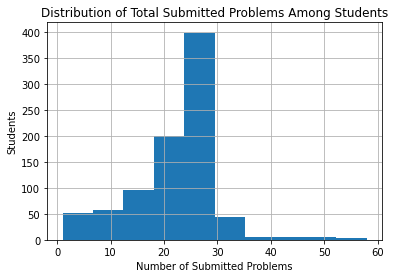

In [40]:
hist_all_problems = sum_problems.hist()
for ax in hist_all_problems.flatten():
    ax.set_xlabel("Number of Submitted Problems")
    ax.set_ylabel("Students")
    ax.set_title("Distribution of Total Submitted Problems Among Students")
plt.savefig('C:/Users/Elijah/Documents/GitHub/code-to-ast/data-analysis/graphs/hist_all_problems.png')

In [12]:
os.chdir("C:/Users/Elijah/Desktop/results-only-full-scores")
fullScoreData = pd.DataFrame()
for filename in os.listdir(os.getcwd()):
    file = pd.read_csv(filename)
    fullScoreData = pd.concat([fullScoreData, file])

In [19]:
fullScoreData

,Unnamed: 0,Year,Semester,Quiz #,Student ID,Coding Problem,Score,Maximum,Distance,Percent,Distance Z-score,Distance Min-Max Scaled
0,0,2017,fall,quiz06,s1a2bc1e2,AllCharsExcept,5,5,35.053191,0.272878,-0.387510,0.050811
1,1,2017,fall,quiz06,s1a748834,AllCharsExcept,5,5,35.531915,0.276605,-0.364327,0.055676
2,2,2017,fall,quiz06,s204527a1,AllCharsExcept,5,5,40.319149,0.313872,-0.132494,0.104324
3,3,2017,fall,quiz06,s20ffbd50,AllCharsExcept,5,5,128.457447,1.000000,4.135801,1.000000
4,4,2017,fall,quiz06,s2d43f936,AllCharsExcept,5,5,88.053191,0.685466,2.179134,0.589405
...,...,...,...,...,...,...,...,...,...,...,...,...
103,103,2018,fall,quiz11,seb2c407c,WriteAndGrade,50,50,270.803738,0.698554,1.649165,0.566781
104,104,2018,fall,quiz11,see34afd4,WriteAndGrade,50,50,202.766355,0.523047,0.510975,0.314555
105,105,2018,fall,quiz11,sf0118345,WriteAndGrade,50,50,138.186916,0.356461,-0.569367,0.075148
106,106,2018,fall,quiz11,sf1f60f2f,WriteAndGrade,50,50,141.177570,0.364176,-0.519337,0.086235


In [15]:
fullScoreData2 = fullScoreData.drop(fullScoreData.columns[0], axis=1)

In [17]:
fullScoreData2['Problem Count'] = np.ones(12586)

In [21]:
f_students_sum = fullScoreData2.groupby("Student ID").sum()

In [22]:
f_sum_problems = f_students_sum.loc[:, ['Problem Count']]

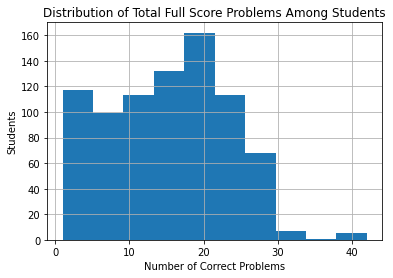

In [38]:
hist2 = f_sum_problems.hist()
for ax in hist2.flatten():
    ax.set_xlabel("Number of Correct Problems")
    ax.set_ylabel("Students")
    ax.set_title("Distribution of Total Full Score Problems Among Students")
plt.savefig('C:/Users/Elijah/Documents/GitHub/code-to-ast/data-analysis/graphs/hist_full_score_problems.png')